## Imports

In [13]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from champ import Field
from polarizer import Polarizer

## Create different types of waves

In [14]:

# CREATE A FLAT TITLTED FIELD WITH ARBITRARY TIP AND TILT
f_plan_wave = Field(256, wavelength=632.8e-9, field_map='plan_wave',
                    incidence_angles=[.51, .255])
# CREATE A GAUSSIAN FIELD
f_gaussian_wave = Field(256, wavelength=632.8e-9, field_map='gaussian',
                        gaussian_center=[-50,50], gaussian_variance=100)

## Display complex amplitudes

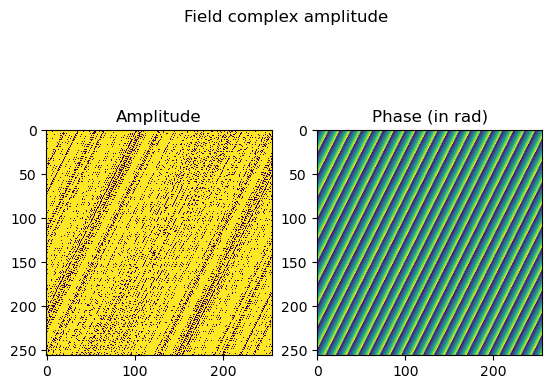

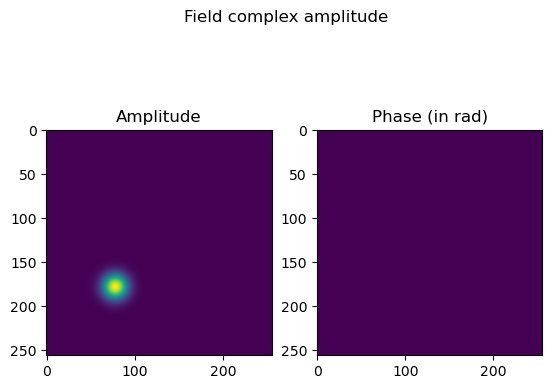

In [15]:
# DISPLAY PLAN WAVE AMPLITUDE AND PHASE
f_plan_wave.disp_complex_amplitude()

# DISPLAY PLAN WAVE AMPLITUDE AND PHASE
f_gaussian_wave.disp_complex_amplitude()

## Create different types of polarizers

In [16]:
# CREATE A LINEAR POLARIZER PARALLEL TO THE HORIZONTAL AXIS
p_linear = Polarizer('linear', angle=0)
# CREATE A BIREFRIGENT MATERIAL POLARIZER WITH FAST AXIS ORIENTED AT PI/4 AND A
# PI/2 PHASE RETARDATION (TO TRANSFORM AN HORIZONTAL POLARIZATION TO A
# LEFT-HANDED CIRCULAR POLARIZATION)
p_retarder = Polarizer('retarder', angle=-np.pi/4, phase_retardation=np.pi/2)

## Display polarization then propagate the field

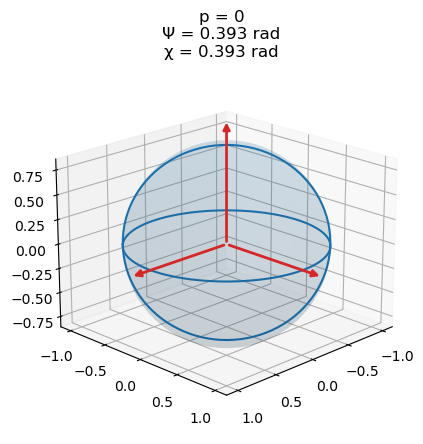

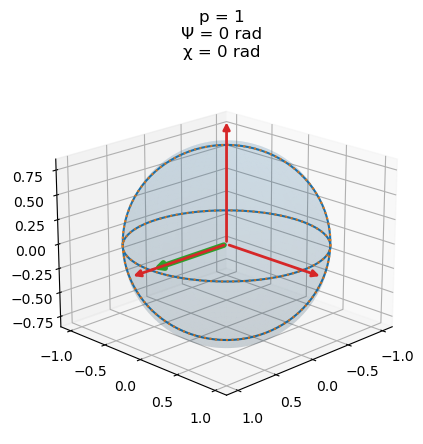

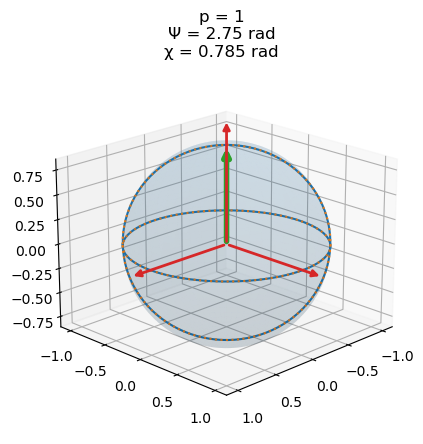

In [17]:
# DISPLAY POINCARE SPHERE FOR UNPOLARIZED F_PLAN_WAVE (POLARIZATION DEGREE P IS
# ZERO SO THE SPHERE IS NOT VISIBLE)
f_plan_wave.disp_polarization()

# PROPAGATE FIELD THROUGH POLARIZER
f_plan_wave*p_linear

# DISPLAY POINCARE SPHERE FOR LINEARLY POLARIZED F_PLAN_WAVE
f_plan_wave.disp_polarization()

f_plan_wave*p_retarder

# DISPLAY POINCARE SPHERE FOR LINEARLY POLARIZED F_PLAN_WAVE
f_plan_wave.disp_polarization()

## Malus law simulated with fiatlux

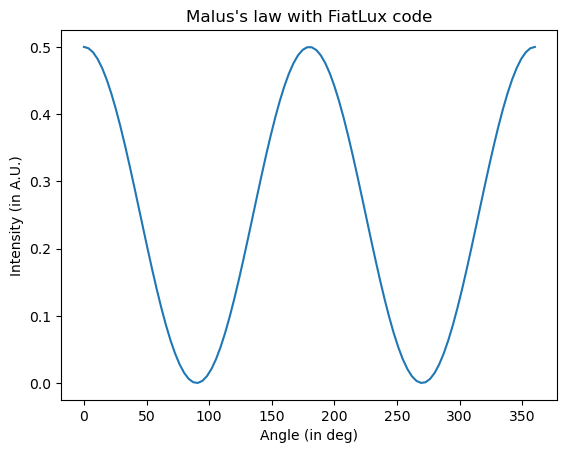

In [18]:
# DEFINE A NEW FIELD
f = Field(256)
# DEFINE THE POLARIZER
polarizer = Polarizer('linear', angle=0)
# DEFINE THE ANALYZER
analyzer = Polarizer('linear', angle=0)
# DEFINE THE NUMBER OF INTENSITY MEASUREMENT
nb_measurement = 100
# DEFINE THE ANGLES TO SCAN
theta = np.linspace(0, 2*np.pi, nb_measurement)
# PRE-ALLOCATE THE INTENSITY MEASUREMENT
intensity = np.zeros((nb_measurement, 1))
# INITIALIZE LOOPS COUNT
idx = 0
for i in theta:
    # REDIFINE A UNITARY UNPOLARIZED WAVE AT EACH STEP
    f.stokes_parameters = [1, 0, 0, 0]
    # CHANGE THE POLARIZER'S ANGLE
    polarizer.angle = i
    # MAKE THE PROPAGATION
    (f*polarizer)*analyzer
    # STORE INTENSITY
    intensity[idx] = f.stokes_parameters[0]
    idx += 1

# PLOT THE STUFFS
plt.figure()
plt.plot(theta*180/np.pi, intensity)
plt.xlabel('Angle (in deg)')
plt.ylabel('Intensity (in A.U.)')
plt.title('Malus\'s law with FiatLux code')
plt.show()